In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
dataset = pd.read_csv('seattle-weather.csv')

In [24]:
print(dataset.shape)

(1461, 6)


In [25]:
print(dataset.describe())

       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


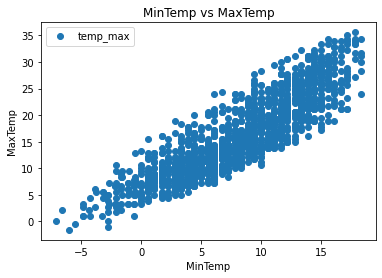

In [26]:
dataset.plot(x='temp_min', y= 'temp_max', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

C:\Users\Besitzer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


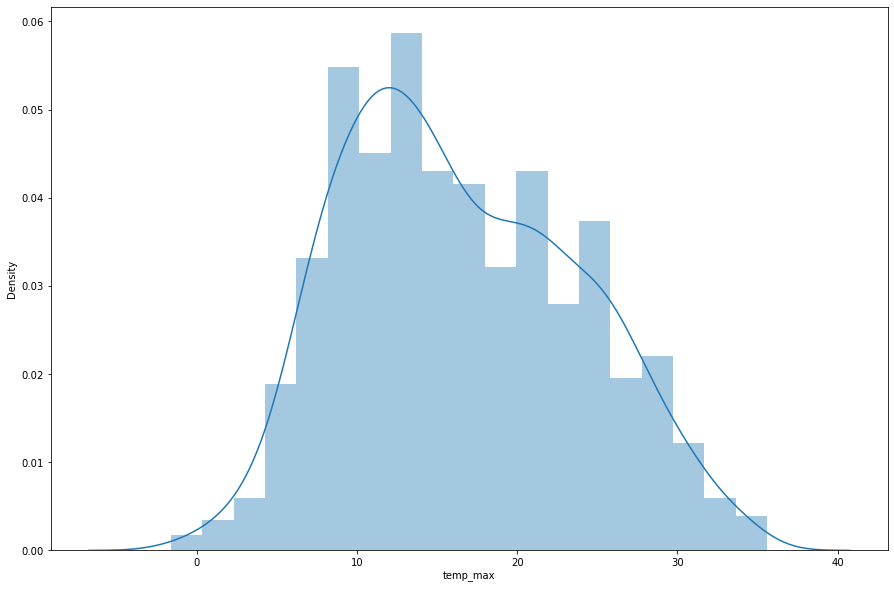

In [27]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['temp_max'])
plt.show()

In [28]:
# split data into training and testing
X = dataset['temp_min'].values.reshape(-1,1)
y = dataset['temp_min'].values.reshape(-1,1)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [31]:
# To retrieve the intercept:

print('Intercept:', regressor.intercept_)
print('Coefficient', regressor.coef_)
y_pred = regressor.predict(x_test)

Intercept: [0.]
Coefficient [[1.]]


In [32]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'predicted': y_pred.flatten()})
print(df)

     Actual  predicted
0      12.2       12.2
1       7.8        7.8
2      10.0       10.0
3       7.8        7.8
4       7.2        7.2
..      ...        ...
288     4.4        4.4
289     7.2        7.2
290    10.0       10.0
291     3.9        3.9
292    12.2       12.2

[293 rows x 2 columns]


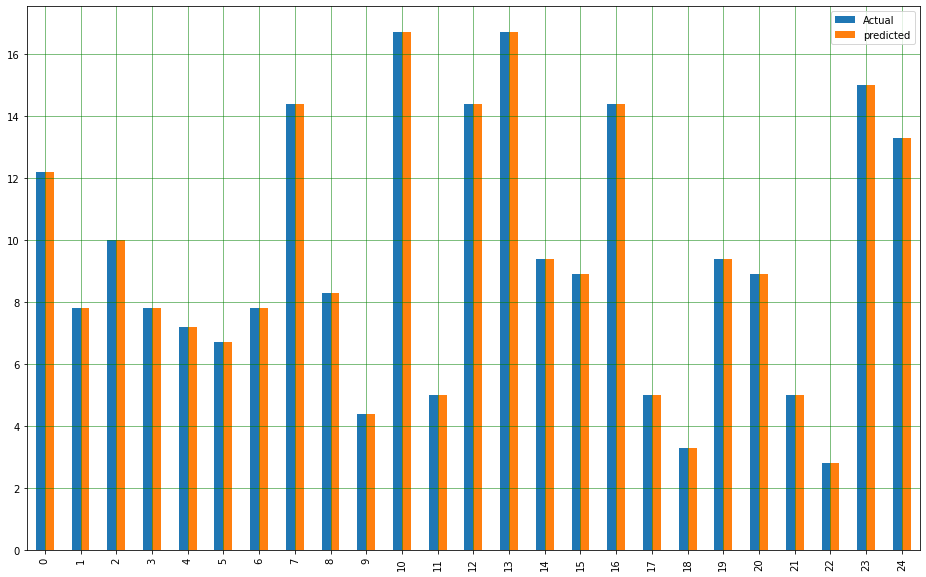

In [33]:
df1 = df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


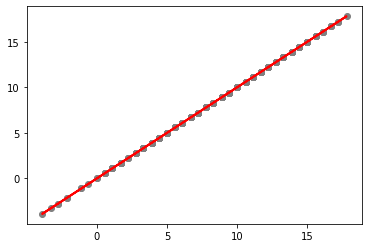

In [34]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color= 'red', linewidth=2)
plt.show()

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean squared Error: 0.0
Root Mean squared Error: 0.0
